# 1. Import

In [1]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd
from pandas import DataFrame

# 데이터 분석을 위한 패키지
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# 시각화를 위한 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 필요모듈 import
import os
import openpyxl
from datetime import datetime

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 폰트 처리
# plt.rc('font', family='NanumGothic')        # for windows
plt.rc('font', family='AppleGothic') # For MacOS

import warnings
warnings.filterwarnings('ignore')

# 2.1. 원본 데이터 로딩

In [2]:
'''
path = "data"
test_path = "/test.csv"
train_path = "/train.csv"
sample_submission_path = "/sample_submission.csv"

test = pd.read_csv(path + test_path)
train = pd.read_csv(path + train_path)


# 격자공간고유정보 다운로드 https://www.bigdata-region.kr/#/dataset/0ad3c882-f7ee-4faf-970d-00c53cb65a84

# 격자공간고유번호 파일 병합 과정

import pandas as pd
import glob
import os

input_file = r'TC_NU_SPG_50_METER'
output_file = r'TC_NU_SPG_50_METER/geo_data.csv'

allFile_list = glob.glob(os.path.join(input_file, 'TC_*')) 


print(allFile_list)

allData = []

for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정


geo_path = r"TC_NU_SPG_50_METER/geo_data.csv"

geo = pd.read_csv(geo_path)
'''


'\npath = "data"\ntest_path = "/test.csv"\ntrain_path = "/train.csv"\nsample_submission_path = "/sample_submission.csv"\n\ntest = pd.read_csv(path + test_path)\ntrain = pd.read_csv(path + train_path)\n\n\n# 격자공간고유정보 다운로드 https://www.bigdata-region.kr/#/dataset/0ad3c882-f7ee-4faf-970d-00c53cb65a84\n\n# 격자공간고유번호 파일 병합 과정\n\nimport pandas as pd\nimport glob\nimport os\n\ninput_file = r\'TC_NU_SPG_50_METER\'\noutput_file = r\'TC_NU_SPG_50_METER/geo_data.csv\'\n\nallFile_list = glob.glob(os.path.join(input_file, \'TC_*\')) \n\n\nprint(allFile_list)\n\nallData = []\n\nfor file in allFile_list:\n    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다\n    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다\n\ndataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합\n# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.\ndataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정\n\n\ngeo_path = r"TC_NU_SPG_50_METER/geo_da

# 2.2. 데이터정보 추가, 파일 생성
#### final_test.csv와 final_train.csv 파일을 만드는 과정입니다. 시간이 오래걸리기 때문에 이미 파일이 있다면 생략하는게 좋습니다.

In [3]:
'''
# 송하인_격자공간고유번호, 수하인_격자공간고유번호를 geo와 매칭해서 격자공간명, 시군구코드, 시군구명 추가

test = pd.merge(test, geo, left_on=['송하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')
test.rename(columns= {'격자공간명':'송하인_격자공간명', '시군구코드':'송하인_시군구코드', '시군구명':'송하인_시군구명'}, inplace=True)
test = pd.merge(test, geo, left_on=['수하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')
test.rename(columns= {'격자공간명':'수하인_격자공간명', '시군구코드':'수하인_시군구코드', '시군구명':'수하인_시군구명'}, inplace=True)

train = pd.merge(train, geo, left_on=['송하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')
train.rename(columns= {'격자공간명':'송하인_격자공간명', '시군구코드':'송하인_시군구코드', '시군구명':'송하인_시군구명'}, inplace=True)
train = pd.merge(train, geo, left_on=['수하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')
train.rename(columns= {'격자공간명':'수하인_격자공간명', '시군구코드':'수하인_시군구코드', '시군구명':'수하인_시군구명'}, inplace=True)


# 이상하게 들어간 내용들 제거

test.drop(['격자공간고유번호_x', '격자공간고유번호_y'], axis = 1, inplace = True)
test = test[['index', '송하인_격자공간고유번호', '송하인_격자공간명',
       '송하인_시군구코드', '송하인_시군구명', '수하인_격자공간고유번호', '수하인_격자공간명', '수하인_시군구코드', '수하인_시군구명', '물품_카테고리']]

train.drop(['격자공간고유번호_x', '격자공간고유번호_y'], axis = 1, inplace = True)
train = train[['index', '송하인_격자공간고유번호', '송하인_격자공간명',
       '송하인_시군구코드', '송하인_시군구명', '수하인_격자공간고유번호', '수하인_격자공간명', '수하인_시군구코드', '수하인_시군구명', '물품_카테고리', '운송장_건수']]

test['송하인_시군구코드'] = test['송하인_시군구코드'].apply(str)
test['수하인_시군구코드'] = test['수하인_시군구코드'].apply(str)
train['송하인_시군구코드'] = train['송하인_시군구코드'].apply(str)
train['수하인_시군구코드'] = train['수하인_시군구코드'].apply(str)

test['송하인_시도코드'] = test['송하인_시군구코드'].str.slice(0,2)
test['수하인_시도코드'] = test['수하인_시군구코드'].str.slice(0,2)
train['송하인_시도코드'] = train['송하인_시군구코드'].str.slice(0,2)
train['수하인_시도코드'] = train['수하인_시군구코드'].str.slice(0,2)

do_dictionary = {
  '11' : '서울특별시',
  '26' : '부산광역시',
  '27' : '대구광역시',
  '28' : '인천광역시',
  '29' : '광주광역시',
  '30' : '대전광역시',
  '31' : '울산광역시',
  '36' : '세종특별자치시',
  '41' : '경기도',
  '42' : '강원도',
  '43' : '충청북도',
  '44' : '충청남도', 
  '45' : '전라북도',
  '46' : '전라남도',
  '47' : '경상북도', 
  '48' : '경상남도',
  '50' : '제주특별자치도'
  }                               # 행정표준코드관리시스템 https://www.code.go.kr/stdcode/regCodeL.do

train['송하인_시도명'] = train['송하인_시도코드'].map(do_dictionary)
train['수하인_시도명'] = train['수하인_시도코드'].map(do_dictionary)
test['송하인_시도명'] = test['송하인_시도코드'].map(do_dictionary)
test['수하인_시도명'] = test['수하인_시도코드'].map(do_dictionary)

test = test[['index', '송하인_격자공간고유번호', '송하인_격자공간명',
       '송하인_시도코드', '송하인_시도명','송하인_시군구코드', '송하인_시군구명', '수하인_격자공간고유번호', '수하인_격자공간명', '수하인_시도코드', '수하인_시도명', '수하인_시군구코드', '수하인_시군구명', '물품_카테고리']]

train = train[['index', '송하인_격자공간고유번호', '송하인_격자공간명',
       '송하인_시도코드', '송하인_시도명','송하인_시군구코드', '송하인_시군구명', '수하인_격자공간고유번호', '수하인_격자공간명', '수하인_시도코드', '수하인_시도명', '수하인_시군구코드', '수하인_시군구명', '물품_카테고리', '운송장_건수']]


test.to_csv('data/final_test.csv')          # 최종본 저장
train.to_csv('data/final_train.csv')        
'''

"\n# 송하인_격자공간고유번호, 수하인_격자공간고유번호를 geo와 매칭해서 격자공간명, 시군구코드, 시군구명 추가\n\ntest = pd.merge(test, geo, left_on=['송하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')\ntest.rename(columns= {'격자공간명':'송하인_격자공간명', '시군구코드':'송하인_시군구코드', '시군구명':'송하인_시군구명'}, inplace=True)\ntest = pd.merge(test, geo, left_on=['수하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')\ntest.rename(columns= {'격자공간명':'수하인_격자공간명', '시군구코드':'수하인_시군구코드', '시군구명':'수하인_시군구명'}, inplace=True)\n\ntrain = pd.merge(train, geo, left_on=['송하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')\ntrain.rename(columns= {'격자공간명':'송하인_격자공간명', '시군구코드':'송하인_시군구코드', '시군구명':'송하인_시군구명'}, inplace=True)\ntrain = pd.merge(train, geo, left_on=['수하인_격자공간고유번호'], right_on = ['격자공간고유번호'], how='left')\ntrain.rename(columns= {'격자공간명':'수하인_격자공간명', '시군구코드':'수하인_시군구코드', '시군구명':'수하인_시군구명'}, inplace=True)\n\n\n# 이상하게 들어간 내용들 제거\n\ntest.drop(['격자공간고유번호_x', '격자공간고유번호_y'], axis = 1, inplace = True)\ntest = test[['index', '송하인_격자공간고유번호', '송하인_격자공간명',\n       '송하인_시군구코드', 

# 3. EDA

In [4]:
# 뉴 데이터 로딩
test = pd.read_csv('data/final_test.csv', index_col = 0)             # unnamed_0 이라는 index가 추가되어 나오지 않게 'index_col = 0' 을 추가했습니다.
train = pd.read_csv('data/final_train.csv', index_col = 0)

train.head()

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
0,0,5011000595017300,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,인천광역시,28710,강화군,음반,3
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,제주특별자치도,50110,제주시,문화컨텐츠,3
2,2,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,서울특별시,11200,성동구,농산물,3
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,제주특별자치도,50110,제주시,기타식품,7
4,4,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,인천광역시,28237,부평구,농산물,3


In [5]:
train['물품_카테고리'].unique()

array(['음반', '문화컨텐츠', '농산물', '기타식품', '수산', '아우터', '신발', '건강식품', '음료',
       '가공식품', '스킨케어', '축산', '헤어케어', '기저귀/물티슈', '의료용품', '기타디지털/가전', '상의',
       '건강용품', '바디케어', '기타스포츠/레저', '출산/유아동의류', '반려동물', '완구/매트', '과자',
       '생활용품', '하의', '문구/사무용품', '선케어', '다이어트식품', '기타패션의류', '냉동/간편조리식품',
       '네일케어', '서재/사무용가구', '선글라스/안경테', '기타화장품/미용', '등산', '모니터', '주방용품',
       '색조메이크업', '침구세트', '침구단품', '인테리어소품', '양말/스타킹', '클렌징', '공구', '이미용가전',
       'PC', '커튼/블라인드', '헤어스타일링', '주방가구', 'DIY자재/용품', '헤어액세서리', '김치',
       '위생/건강용품', '침실가구', '가방', '주방가전', '낚시', '재활운동용품', '자동차용품', '뷰티소품',
       '주얼리', '골프', 'PC주변기기', '수납/정리용품', '음향가전', '잠옷', '패션소품', '언더웨어',
       '원피스/점프슈트', '스포츠잡화', '수납가구', '취미용품', '아웃도어가구', '계절가전', '홈데코', '캠핑',
       '남성화장품', '분유/이유식/아기간식', '베이스메이크업', '헬스', '향수', '모자', '카페트/러그',
       '구강위생용품', '눈관리용품', '기타출산/육아', '기타패션잡화', '기능성', '반찬', '욕실용품',
       '스마트디바이스액세서리', '게임기/타이틀', '생활가전', '유아가구', '출산/유아동잡화', '세탁용품',
       '태블릿PC/노트북액세서리', '스마트디바이스', '지갑'], dtype=object)

In [6]:
category = train.groupby(['물품_카테고리'])['운송장_건수'].sum().reset_index(name = '합계')
category.sort_values(by = '합계', ascending = False, inplace = True)

In [7]:
category.head()

,물품_카테고리,합계
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880


<AxesSubplot:xlabel='물품_카테고리', ylabel='합계'>

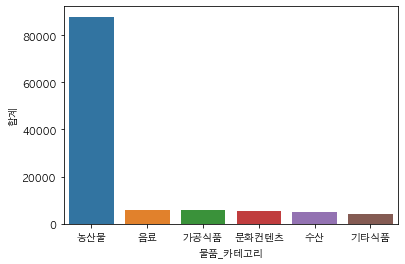

In [8]:
sns.barplot(x="물품_카테고리", y='합계', data=category.head(6))            # head 안에 있는 값 바꿔보면서 탐색!

In [9]:
send = train.groupby(['송하인_시도명'])['운송장_건수'].sum().reset_index(name = '합계')
send.sort_values(by = '합계', ascending = False, inplace = True)

recieve = train.groupby(['수하인_시도명'])['운송장_건수'].sum().reset_index(name = '합계')
recieve.sort_values(by = '합계', ascending = False, inplace = True)

<AxesSubplot:xlabel='송하인_시도명', ylabel='합계'>

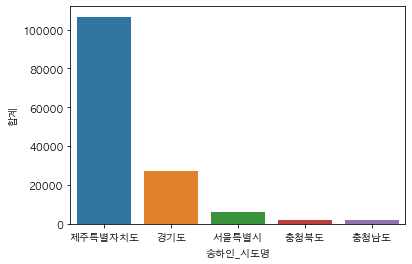

In [10]:
sns.barplot(x="송하인_시도명", y='합계', data=send.head(5))            # head 안에 있는 값 바꿔보면서 탐색!

<AxesSubplot:xlabel='수하인_시도명', ylabel='합계'>

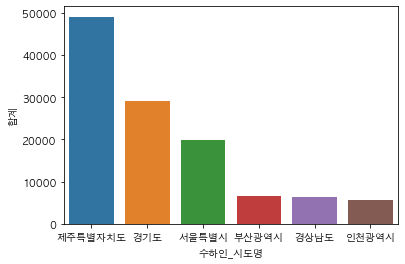

In [11]:
sns.barplot(x="수하인_시도명", y='합계', data=recieve.head(6))            # head 안에 있는 값 바꿔보면서 탐색!

In [12]:
jeju = train[train['수하인_시도명'] == '제주특별자치도']

In [13]:
jeju

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,제주특별자치도,50110,제주시,문화컨텐츠,3
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,제주특별자치도,50110,제주시,기타식품,7
8,8,4136000209094100,다사6663,41,경기도,41360,남양주시,5013000823053400,다나1374,50,제주특별자치도,50130,서귀포시,아우터,3
12,12,4146300018047300,다사6621,41,경기도,41463,용인시기흥구,5011000263069100,다다0801,50,제주특별자치도,50110,제주시,신발,3
16,16,4725000538021400,라바4027,47,경상북도,47250,상주시,5011000596012200,다나1495,50,제주특별자치도,50110,제주시,기타식품,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,라마0391,44,충청남도,44710,금산군,5011000213073200,다다0802,50,제주특별자치도,50110,제주시,스포츠잡화,3
31680,31680,1129000014045300,다사6156,11,서울특별시,11290,성북구,5011000319087100,다다1000,50,제주특별자치도,50110,제주시,스마트디바이스,4
31681,31681,1129000014045300,다사6156,11,서울특별시,11290,성북구,5011000263065200,다다0801,50,제주특별자치도,50110,제주시,스마트디바이스,6
31682,31682,4127300065073100,다사3422,41,경기도,41273,안산시단원구,5011000264061200,다다0901,50,제주특별자치도,50110,제주시,지갑,7


<AxesSubplot:xlabel='물품_카테고리', ylabel='합계'>

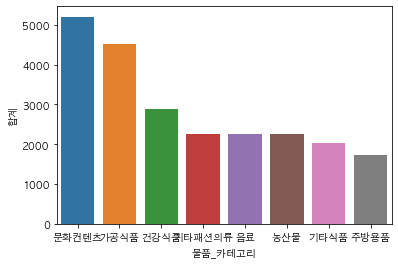

In [14]:
jeju_receive = train[train['수하인_시도명'] == '제주특별자치도']

jeju_receive_category = jeju_receive.groupby(['물품_카테고리'])['운송장_건수'].sum().reset_index(name = '합계')
jeju_receive_category.sort_values(by = '합계', ascending = False, inplace = True)

sns.barplot(x="물품_카테고리", y='합계', data=jeju_receive_category.head(8))            # head 안에 있는 값 바꿔보면서 탐색!

<AxesSubplot:xlabel='물품_카테고리', ylabel='합계'>

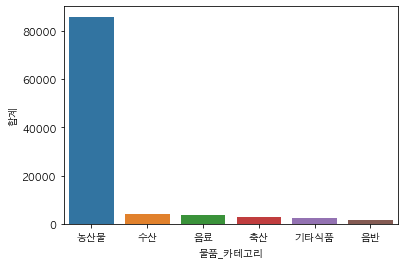

In [15]:
jeju_send = train[train['송하인_시도명'] == '제주특별자치도']       

jeju_send_category = jeju_send.groupby(['물품_카테고리'])['운송장_건수'].sum().reset_index(name = '합계')
jeju_send_category.sort_values(by = '합계', ascending = False, inplace = True)

sns.barplot(x="물품_카테고리", y='합계', data=jeju_send_category.head(6))            # head 안에 있는 값 바꿔보면서 탐색!

In [16]:
jeju_send_category.head()

,물품_카테고리,합계
22,농산물,85874
41,수산,4235
51,음료,3633
59,축산,2800
13,기타식품,2244


In [17]:
size1 = jeju_send_category['합계'].values
size1

array([85874,  4235,  3633,  2800,  2244,  1659,  1586,   892,   793,
         623,   579,   237,   142,   109,   101,    82,    69,    66,
          61,    55,    46,    45,    38,    37,    35,    35,    34,
          33,    31,    31,    29,    27,    26,    22,    21,    21,
          18,    16,    14,    13,    12,    11,    11,    11,    10,
          10,    10,     9,     8,     7,     7,     7,     7,     6,
           4,     4,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3])

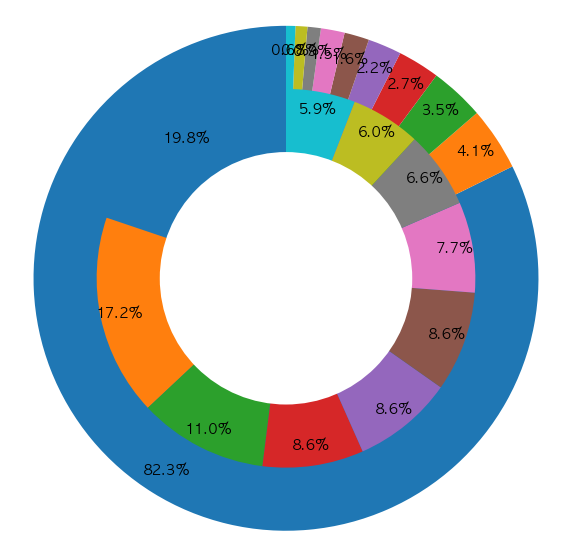

In [18]:

size1 = jeju_send_category['합계'].head(10).values

size2 = jeju_receive_category['합계'].head(10).values


fig = plt.figure(figsize = (10,10))
plt.pie(
  size1, 
  startangle = 90, 
  radius = 1, 
  textprops = {'fontsize':14}, 
  autopct = '%1.1f%%',
  pctdistance = 0.9)
plt.pie(
  size2, 
  startangle = 90, 
  radius = 0.75, 
  textprops = {'fontsize':14}, 
  autopct = '%1.1f%%',
  pctdistance = 0.9)

centre_circle = plt.Circle((0,0), 0.50, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()


<AxesSubplot:xlabel='송하인_격자공간고유번호', ylabel='수하인_격자공간고유번호'>

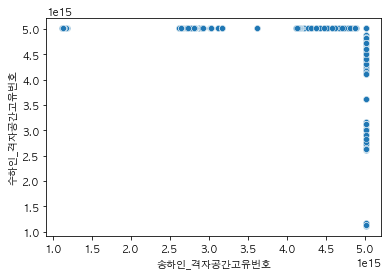

In [19]:
sns.scatterplot(x="송하인_격자공간고유번호", y='수하인_격자공간고유번호', data=train)            # head 안에 있는 값 바꿔보면서 탐색!


In [20]:
train[train['운송장_건수']==413]   

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
25394,25394,4117300018005400,다사5232,41,경기도,41173,안양시동안구,5011000168096300,다다0903,50,제주특별자치도,50110,제주시,기타패션의류,413


In [21]:
train[train['운송장_건수']==239]

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
30090,30090,4117300018005400,다사5232,41,경기도,41173,안양시동안구,5011000318041400,다다0900,50,제주특별자치도,50110,제주시,기타패션의류,239


# 할 일

1. 하이퍼파라미터 찾기 (grid search, randomsearch, optuna 사용법 공부)
2. 최적화 시킨 후, boost 기반 모델 사용(Catboost가 성능이 잘 나온다고 함, Catboost 사용법 공부, 다른 것들도 해보기)
3. 제주도에서 보낸것 / 제주도에서 받은것 데이터 : 데이터 분리해서 학습 vs 분리 안하고 학습 뭐가 더 좋은지 확인하기 


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [23]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import graphviz

In [24]:
train

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
0,0,5011000595017300,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,인천광역시,28710,강화군,음반,3
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,제주특별자치도,50110,제주시,문화컨텐츠,3
2,2,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,서울특별시,11200,성동구,농산물,3
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,제주특별자치도,50110,제주시,기타식품,7
4,4,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,인천광역시,28237,부평구,농산물,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,라마0391,44,충청남도,44710,금산군,5011000213073200,다다0802,50,제주특별자치도,50110,제주시,스포츠잡화,3
31680,31680,1129000014045300,다사6156,11,서울특별시,11290,성북구,5011000319087100,다다1000,50,제주특별자치도,50110,제주시,스마트디바이스,4
31681,31681,1129000014045300,다사6156,11,서울특별시,11290,성북구,5011000263065200,다다0801,50,제주특별자치도,50110,제주시,스마트디바이스,6
31682,31682,4127300065073100,다사3422,41,경기도,41273,안산시단원구,5011000264061200,다다0901,50,제주특별자치도,50110,제주시,지갑,7


### 목표 변수 : 수치형

### 설명 변수 : 범주형

### > CART(분산 감소량)나 CHAID(평균 차 분산 분석)을 하면 좋다?

### https://www.youtube.com/watch?v=O5-6n9a0tXU

### 

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe_category = pd.get_dummies(train['물품_카테고리'], prefix = '물품_카테고리')
ohe_song_sido = pd.get_dummies(train['송하인_시도명'], prefix = '송하인_시도명')
ohe_su_sido = pd.get_dummies(train['수하인_시도명'], prefix = '수하인_시도명')
train_ohe = pd.concat([train, ohe_song_sido, ohe_su_sido, ohe_category], axis = 1)
train_ohe.head()

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,...,물품_카테고리_클렌징,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코
0,0,5011000595017300,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,...,0,0,0,0,0,0,0,0,0,0
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,...,0,0,0,0,0,0,0,0,0,0
2,2,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,...,0,0,0,0,0,0,0,0,0,0
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,...,0,0,0,0,0,0,0,0,0,0
4,4,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,...,0,0,0,0,0,0,0,0,0,0


# 

In [26]:
train_ohe['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].apply(str)

train_ohe['송하인_고유1'] = train_ohe['송하인_격자공간고유번호'].str.slice(0,5)
train_ohe

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,...,물품_카테고리_태블릿PC/노트북액세서리,물품_카테고리_패션소품,물품_카테고리_하의,물품_카테고리_향수,물품_카테고리_헤어스타일링,물품_카테고리_헤어액세서리,물품_카테고리_헤어케어,물품_카테고리_헬스,물품_카테고리_홈데코,송하인_고유1
0,0,4167000577042200,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,...,0,0,0,0,0,0,0,0,0,41670
1,1,1156000009012200,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,...,0,0,0,0,0,0,0,0,0,11560
2,2,4122000363057300,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,...,0,0,0,0,0,0,0,0,0,41220
3,3,5011000436041400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,...,0,0,0,0,0,0,0,0,0,50110
4,4,4150000241065200,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,...,0,0,0,0,0,0,0,0,0,41500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,NaN,라마0391,44,충청남도,44710,금산군,5011000213073200,다다0802,50,...,0,0,0,0,0,0,0,0,0,NaN
31680,31680,NaN,다사6156,11,서울특별시,11290,성북구,5011000319087100,다다1000,50,...,0,0,0,0,0,0,0,0,0,NaN
31681,31681,NaN,다사6156,11,서울특별시,11290,성북구,5011000263065200,다다0801,50,...,0,0,0,0,0,0,0,0,0,NaN
31682,31682,NaN,다사3422,41,경기도,41273,안산시단원구,5011000264061200,다다0901,50,...,0,0,0,0,0,0,0,0,0,NaN


In [27]:
# train_ohe.drop(['격자공간고유번호_x', '격자공간고유번호_y'], axis = 1, inplace = True)